# Accuracy of Newton-Cotes

In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as pt

A function to make Vandermonde matrices:
    
(Note that the ordering of this matrix matches the convention in our class but *disagrees* with `np.vander`.)

In [2]:
def vander(nodes, ncolumns=None):
    if ncolumns is None:
        ncolumns = len(nodes)
    result = np.empty((len(nodes), ncolumns))
    for i in range(ncolumns):
        result[:, i] = nodes**i
    return result

Fix a set of nodes:

In [20]:
 nodes = [0.5] # Midpoint
# nodes = [0]
#nodes = [0, 1] # Trapezoidal
#nodes = [0, 0.5, 1] # Simpson's
#nodes = [0, 1/3, 1]

Find the weights for the Newton-Cotes rule for the given nodes on $[0,1]$:

In [21]:
(a, b) = (0, 1)
nodes = np.array(nodes)
n = len(nodes)

degs = np.arange(n)
rhs = 1/(degs+1)*(b**(degs+1 - a**(degs+1)))
weights = la.solve(vander(nodes).T, rhs)
print(weights)

[1.]


Here is a function and its definite integral from $0$ to $x$:

$$F(x)=\int_0^x f(\xi)d\xi$$

In [22]:
fdeg = 15
def f(x):
    return sum((-x)**i for i in range(fdeg + 1))

def F(x):
    return sum(
        (-1)**i*1/(i+1)*(
            (x)**(i+1)-0**(i+1)
            )
        for i in range(fdeg + 1))


Plotted:

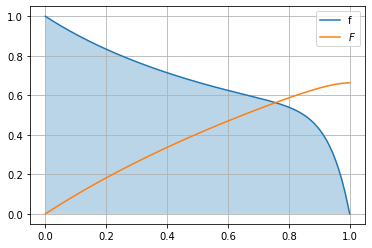

In [23]:
plot_x = np.linspace(0, 1, 200)

pt.plot(plot_x, f(plot_x), label="f")
pt.fill_between(plot_x, 0*plot_x, f(plot_x),alpha=0.3)
pt.plot(plot_x, F(plot_x), label="$F$")
pt.grid()
pt.legend(loc="best")

This here plots the function, the interpolant, and the area under the interpolant:

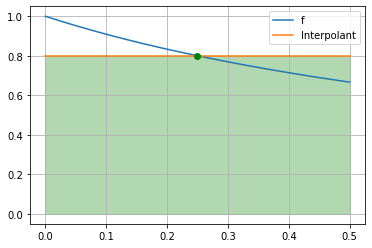

In [24]:
# fix nodes
h = 0.5
x = nodes * h

# find interpolant
coeffs = la.solve(vander(x), f(x))

# evaluate interpolant
plot_x = np.linspace(0, h, 200)
interpolant = vander(plot_x, len(coeffs)) @ coeffs

# plot
pt.plot(plot_x, f(plot_x), label="f")
pt.plot(plot_x, interpolant, label="Interpolant")
pt.fill_between(plot_x, 0*plot_x, interpolant, alpha=0.3, color="green")
pt.plot(x, f(x), "og")
pt.grid()
pt.legend(loc="best")

Compute the following:

*   The true integral as `true_val` (from `F`)
*   The quadrature result as `quad` (using `x` and `weights` and `h`)
*   The error as `err` (the difference of the two)

    (Do not be tempted to compute a relative error--that has one order lower.)

Compare the error for $h=1,0.5,0.25$. What order of accuracy do you observe?

In [25]:
#clear

errors = []

for h in [1, 0.5, 0.25, 0.125, 0.125*0.5, 1/32]:
    true_val = F(h)
    quad = h * weights @ f(h * nodes)
    error = abs(quad - true_val)
    print(h, true_val, quad, error)
    
    errors.append(error)

1 0.6628718503718505 0.666656494140625 0.0037846437687745205
0.5 0.405464803170835 0.39999999990686774 0.005464803263967255
0.25 0.22314355131143945 0.22222222222222143 0.0009213290892180204
0.125 0.11778303565638346 0.11764705882352941 0.0001359768328540456
0.0625 0.06062462181643485 0.06060606060606061 1.8561210374239134e-05
0.03125 0.030771658666753687 0.03076923076923077 2.427897522916389e-06


Estimate the order of accuracy:

We assume that the error depends on the mesh spacings $h$ as
$E(h)\approx C h^p$ for some unknown power $p$.  Taking the $\log$
of this approximate equality reveals a linear function in $p$:
$$
E(h) \approx C h^p \quad \iff \quad \log E(h) \approx \log(C) +
p\log(h).
$$
You can now either do a least-squares fit for $\log C$ and $p$ from
a few data points $(h,E(h))$ (more accurate, more robust), or you
can use just two grid sizes $h_1$ and $h_2$, and estimate the slope:
(less accurate, less robust)
$$
   p \approx \frac{ \log(\frac{E(h_2)}{E(h_1)}) } {\log(\frac{h_2}{h_1})}.
$$
This is called the *empirical order of convergence* or EOC.



In [23]:
for i in range(len(errors)-1):
    print(np.log(errors[i+1]/errors[i])/np.log(1/2))

1.9068441979782607
2.5605266307873995
2.7603285008344334
2.8729980764064282
2.9345113566351206
